# Teil c - Adaline

# Adaptives Lineares Neuron (Adaline)

## Weiterentwicklung des Perzeptrons

Das Perzeptron liefert keine stabile Lösung, falls das Problem nicht linear trennbar ist. Stabil bedeutet, wenn ein neues Trainingsbeispiel betrachtet wird, nicht sofort alles vergisst, was bis zu diesem Zeitpunkt gelernt wurde. Aus diesem Grund haben Widrow und Hoff ein neuronales Netz vorgeschlagen, das genau diese Eigenschaften besitzt. Sie nannten es *adaptive linear* (ADAptive LInear Neuron) bzw. Adaline. Adaline ist ein weiteres neuronales Netz mit einer einzigen Schicht. Adaline wurde nur wenige Jahre nach dem Perzeptron-Algorithmus veröffentlicht und kann als Verbesserung aufgefasst werden. Es bildet die Grundlage für fortgeschrittene Lernalgorithmen für die Klassifizierung, wie bspw. die logistische Regression, Support Vector Machines, Multi-layer Perceptrons, etc.

### Änderungen der Gewichtungen
Die Berechnung der Änderungen der Gewichte findet bei beiden Algorithmen unterschiedlich statt: <br>

<b>Perzeptron</b>: <br>

Beim Perzeptron wird der Ouput, dh die Klassifikation des Inputs, zur Fehlerkorrektur verwendet. Das bedeutet, dass ein Binärwert für die Fehlerkorrektur verwendet wird. <br>

$\Delta w_j = \eta \cdot (y^{(i)} - \hat{y}^{(i)}) \cdot x_j^{(i)}$ <br>

<b>Adaline</b>: <br>


Beim Adaline wird der Net Input (dh die gewichtete summe $s$ bzw. $net$) zur Fehlerkorrektur verwendet. Das bedeutet, dass ein kontinuierlicher Wert für die Fehlerkorrektur verwendet wird. Das sorgt dafür, dass die Änderungen an den Gewichten besser in Relation zu den Fehlern stehen. Ein weiterer Unterschied beim Adaline-Algorithmus ist, dass die Berechnung der Gewichtsaktualisierung auf allen Trainingsobjekten erfolgt. Aus diesem Grund wird diese Form des Lernalgorithmus als Stapelverarbeitung bezeichnet.


$\Delta w_j = \eta \cdot (y - net) \cdot x_j$ <br>

### Lernen im Adaline-Algorithmus

Der wesentliche Unterschied des Adaline-Algorithmus besteht darin, dass die Aktualisierung der Gewichtungen auf einer linearen Aktivierungsfunktion beruht. Allerdings ist $\phi(s)$ mit $s$ = $\vec{w}^T \vec{x} +w_0$ eine reele Zahl und keine ganzzahlige Klassenbezeichnung.  Bei Adaline ist diese Funktion $\phi(s)$ einfach die identische Abbildung der Nettoeingabefunktion, sodass $\phi(s) = \vec{w}^T \vec{x}+w_0$. Die lineare Aktivierungsfunktion wird dazu genutzt die Gewichtungen zu lernen. Anschließend kann eine Schwellenwertfunktion (besitzt Ähnlichkeit mit der bereits bekannten Sprungfunktion) verwendet werden, um die Klassenbezeichnungen vorherzusagen. <br>

Bei fortgeschrittenen Lernalgorithmen, wie bspw. dem Multi-layer Perceptron, kann als Aktivierungsfunktion die Sigmoid-Funktion ( [Siehe Web-Link](https://en.wikipedia.org/wiki/Sigmoid_function) ) eingesetzt werden.

Folgende Abbildung zeigt, dass der Adaline-Algorithmus die tatsächlichen Klassenzeichnungen mit den stetigen Ausgaben der linearen Aktivierungsfunktion vergleicht. Um Fehler des Modells zu berechnen und die Gewichtungen zu aktualisieren. <br>




<img src="./Figures/Adaline.png" alt="drawing" style="width:600px;"/>


Zum Vergleich, das Perzeptron aktualisiert die Gewichtungen nach jedem Objekt inkrementell. Des Weiteren beruht beim Perzeptron die Aktualisierung der Gewichtungen auf einer einfachen Sprungfunktion. Das Perzeptron vergleicht die tatsächlichen Klassenzeichnungen mit den vorhergesagten Klassenzeichnungen.

<img src="./Figures/Perzeptron.png" alt="drawing" style="width:600px;"/>

## Implementierung

Die Implementierungen der Adaline-Regel und der Perzeptron-Regel sind sich sehr ähnlich. Die Implementierung erfolgt innerhalb der Klasse <b>Adaline</b>. Im folgenden werden die einzelnen Methoden und deren Funktionsweise kurz vorgestellt. <br>

#### Konstruktor
Das Perceptron-Objekt wird mit der Lernrate <b>eta</b> und der Anzahl der Epochen (Durchläufe der Trainingsdaten) <b>epochs</b> initialisiert. Wählen Sie geeignete Werte für die Epoche (Anzahl der Durchläufe) und die Lernrate Eta.

#### activation()-Methode:
Diese Funktion bewirkt im Code nichts, denn es handelt sich um eine Identitätsfunktion. Sie existiert zur Demonstration, wie Informationen durch ein einschichtiges Neuronales Netz fließen: Merkmale der Eingabedaten, Nettoeingabe, Aktivierungsfunktion und Ausgabe. <br>

Weitere Klassifizierer (wie bspw. logistische Regression, Multi-layer Perzeptron, etc.) sind sehr eng mit Adaline verwandt. Denn sie unterscheiden sich in der Aktivierungs- und Straffunktion.

#### fit()-Methode:

<b>Gewichtungen</b>: <br>
Die Gewichtungen werden wie beim Perzeptron initialisiert. <br>
Die Aktualisierung der Gewichtung der Bias-Einheit wird anhand der Summe der Errors berechnet.<br>
Die Aktualisierung der weiteren Gewichtungen von 1 bis m wird anhand <b>X.T.dot(errors)</b> berechnet. Hierbei handelt es sich um eine *Matrix-Vektor-Multiplikation* von Merkmalsmatrix und Fehlervektor. <br>

Die Berechnung der Gewichtsaktualisierung erfolgt auf allen Trainingsobjekten. Zum Vergleich, beim Perzeptron werden die Gewichtungen nach der Berechnung jedes einzelnen Trainingsexemplar aktualisiert. <br>

Sammeln Sie in einer Liste <b>cost</b> die in jeder Epoche auftretenden quadrierten Fehler nach folgender Formel: <b>cost_epoch= (error**2).sum() / 2.0</b>. Dadurch kann später analysiert werden, wie gut der Adline-Algorithmus während des Trainings funktioniert hat. Geben Sie diese Liste als Rückgabewert der Methode zurück.<br>

In [95]:
class Adaline2(object):
    
    def __init__(self, eta=None, epochs=None):
        self.eta = eta
        self.epochs = epochs
        self.w = np.random.normal(loc=0.01, size=3)
        self.w[0] = 1
        self.cost = []
        
    def gewichtete_summe(self, x):
        return x.dot(self.w)
    
    def activation(self, X):
        #linear
        return X
        
    def _add_bias(self, X):
        bias = np.ones((X.shape[0], 1))
        biased_X = np.hstack((bias, X))
        return biased_X
    
    def fit(self, X, y):
            X = self._add_bias(X)
            for e in range(self.epochs):
                cost_epoch = 0
                errors = []
                
                for i in range(len(X)):
                    summe = self.gewichtete_summe(X[i])
                    activation_sum = self.activation(summe)
                    errors.append(activation_sum)
                #Δ𝑤𝑗=𝜂⋅(𝑦−𝑛𝑒𝑡)⋅𝑥𝑗 
                Y_minus_error = np.subtract(y, np.array(errors))
                self.w = self.w + self.eta * X.T.dot(Y_minus_error)
                cost_epoch= (np.array(Y_minus_error ) ** 2).sum() / 2.0
                self.cost.append(cost_epoch)
            
            return self.cost

In [59]:
Δ𝑤𝑗=𝜂⋅(𝑦−𝑛𝑒𝑡)⋅𝑥𝑗 

SyntaxError: invalid character in identifier (<ipython-input-59-8d176bf19b9b>, line 1)

In [224]:
class Adaline(object):
    
    def __init__(self, eta=None, epochs=None):
        self.eta = eta
        self.epochs = epochs
        
    def gewichtete_summe(self, x):
        summe = np.dot(x, self.weights[1:]) + self.weights[0]
        return summe
    
    def activation(self, x):
        return x
    
    def fit(self, X, y):
        cost = []
        self.weights = (np.random.normal(0, 0.1, (X.shape[1] + 1)))
        self.weights[0] = 1
        for i in range(self.epochs):       
            summe = self.gewichtete_summe(X)
            errors = self.activation(y - summe)
            self.weights[1:] = np.add(self.weights[1:], (X.T.dot(errors) * self.eta))
            self.weights[0] =  np.add(self.weights[0] , (self.eta * errors.sum()))
            cost_epoch = (errors**2).sum()/2.0
            cost.append(cost_epoch)
        return cost 

In [225]:
a = np.random.normal(0, 0.1, (X.shape[1] + 1))
a[0] = 1
print(a)
a[1:]

[ 1.          0.0395998  -0.01423758]


array([ 0.0395998 , -0.01423758])

## Datensatz, Training und Visualisierung des Errors

Wählen Sie denselben Datensatz wie beim Perzeptron. <br>
Führen Sie das Training anhand verschiedener Parameter aus und visualisieren Sie die Ergebnisse. <br>

In [226]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv("./Data/iris.data", header=None, sep=",")
df.head()
df = df.drop(columns=[1,3])


In [227]:
setosa = df.loc[df[4]=='Iris-setosa']
versicolor =df.loc[df[4]=='Iris-versicolor']
setosa[4].values[:] = 0
versicolor[4].values[:] = 1

df_new = pd.concat([setosa, versicolor]).sample(frac=1)
print(df_new)
# Auswahl von setosa und versicolor
y = df_new[4]
# Auswahl von Kelch- und Bluetenblattlaenge
X = df_new[[0,2]]

      0    2  4
59  5.2  3.9  1
83  6.0  5.1  1
11  4.8  1.6  0
64  5.6  3.6  1
71  6.1  4.0  1
..  ...  ... ..
70  5.9  4.8  1
19  5.1  1.5  0
57  4.9  3.3  1
45  4.8  1.4  0
23  5.1  1.7  0

[100 rows x 3 columns]


0.01, 10


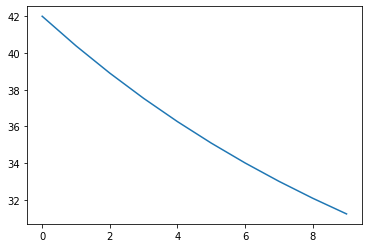

In [236]:
print("0.01, 10")
plt.plot(Adaline(0.00001, 10).fit(X,y))
plt.show()